#### This code is used to extract the procedure of analysis for the deployment of ML pipeline

In [98]:
# Data analysis package import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx
import warnings
warnings.filterwarnings(action="ignore")


In [99]:
df = pd.read_csv("data\\raw\IT_customer_churn.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [101]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull().sum()

np.int64(11)

In [102]:
df.TotalCharges=df["TotalCharges"].str.strip()
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [103]:
# Is the dataset balanced?
100*df["Churn"].value_counts(normalize=True)

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64

In [104]:
df["Churn"]=df["Churn"].map({'Yes':1,'No':0})

# EDA

In [105]:
def list_categorical(df):
    obj_col = df.select_dtypes(include='object').columns
    for col in obj_col:
        print ( f"The categories of column {col}: {df[col].unique()}")

In [106]:
list_categorical(df)

The categories of column gender: ['Female' 'Male']
The categories of column Partner: ['Yes' 'No']
The categories of column Dependents: ['No' 'Yes']
The categories of column PhoneService: ['No' 'Yes']
The categories of column MultipleLines: ['No phone service' 'No' 'Yes']
The categories of column InternetService: ['DSL' 'Fiber optic' 'No']
The categories of column OnlineSecurity: ['No' 'Yes' 'No internet service']
The categories of column OnlineBackup: ['Yes' 'No' 'No internet service']
The categories of column DeviceProtection: ['No' 'Yes' 'No internet service']
The categories of column TechSupport: ['No' 'Yes' 'No internet service']
The categories of column StreamingTV: ['No' 'Yes' 'No internet service']
The categories of column StreamingMovies: ['No' 'Yes' 'No internet service']
The categories of column Contract: ['Month-to-month' 'One year' 'Two year']
The categories of column PaperlessBilling: ['Yes' 'No']
The categories of column PaymentMethod: ['Electronic check' 'Mailed check' '

In [107]:
redundant_col=["MultipleLines",
               "OnlineSecurity",
               "OnlineBackup",
               "DeviceProtection",
               "TechSupport","StreamingTV","StreamingMovies"] # Columns containing redundant values
for col in redundant_col:
    df[col]=df[col].where(df[col].isin(["Yes","No"]),"No")
list_categorical(df)

The categories of column gender: ['Female' 'Male']
The categories of column Partner: ['Yes' 'No']
The categories of column Dependents: ['No' 'Yes']
The categories of column PhoneService: ['No' 'Yes']
The categories of column MultipleLines: ['No' 'Yes']
The categories of column InternetService: ['DSL' 'Fiber optic' 'No']
The categories of column OnlineSecurity: ['No' 'Yes']
The categories of column OnlineBackup: ['Yes' 'No']
The categories of column DeviceProtection: ['No' 'Yes']
The categories of column TechSupport: ['No' 'Yes']
The categories of column StreamingTV: ['No' 'Yes']
The categories of column StreamingMovies: ['No' 'Yes']
The categories of column Contract: ['Month-to-month' 'One year' 'Two year']
The categories of column PaperlessBilling: ['Yes' 'No']
The categories of column PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [108]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5345,Male,0,No,No,26,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,No,Electronic check,89.80,2335.30,1
3232,Male,0,Yes,Yes,36,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Mailed check,53.65,1939.35,0
6078,Female,0,Yes,No,55,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,90.15,4916.95,0
1161,Male,0,No,Yes,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,31.35,31.35,1
5886,Female,0,Yes,Yes,47,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.75,948.90,0


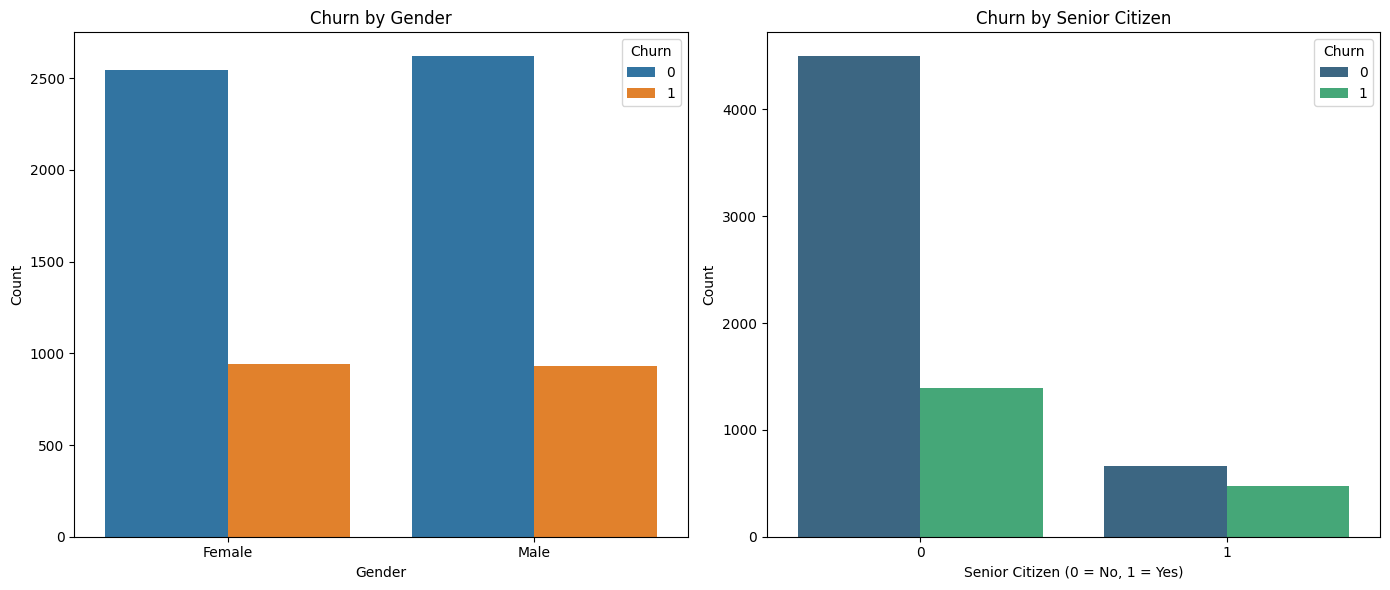

In [109]:

# Create a 1x2 subplot structure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Churn by Gender
sns.countplot(data=df, x='gender', hue='Churn', ax=axes[0])
axes[0].set_title('Churn by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plot 2: Churn by Senior Citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn',palette="viridis", ax=axes[1])
axes[1].set_title('Churn by Senior Citizen')
axes[1].set_xlabel('Senior Citizen (0 = No, 1 = Yes)')
axes[1].set_ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



<Figure size 800x500 with 0 Axes>

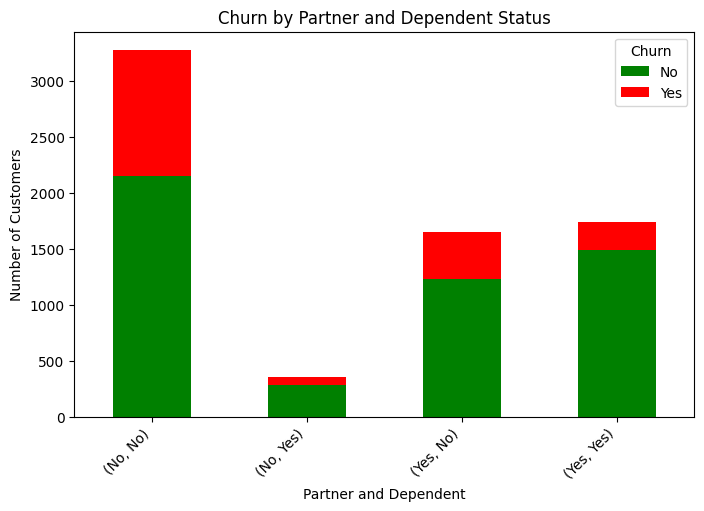

In [110]:

# Set figure size
plt.figure(figsize=(8, 5))

# Create a crosstab for better stacked bar plot representation
churn_crosstab = pd.crosstab(index=[df['Partner'], df['Dependents']], columns=df["Churn"])

# Plot the stacked bar plot
churn_crosstab.plot(kind='bar', stacked=True, color=["green", "red"], figsize=(8, 5))

# Add titles and labels
plt.title("Churn by Partner and Dependent Status")
plt.xlabel("Partner and Dependent")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Churn", labels=["No", "Yes"])

# Show the plot
plt.show()





In [111]:
churn_crosstab

Churn                  0     1
Partner Dependents            
No      No          2157  1123
        Yes          282    77
Yes     No          1233   420
        Yes         1491   249

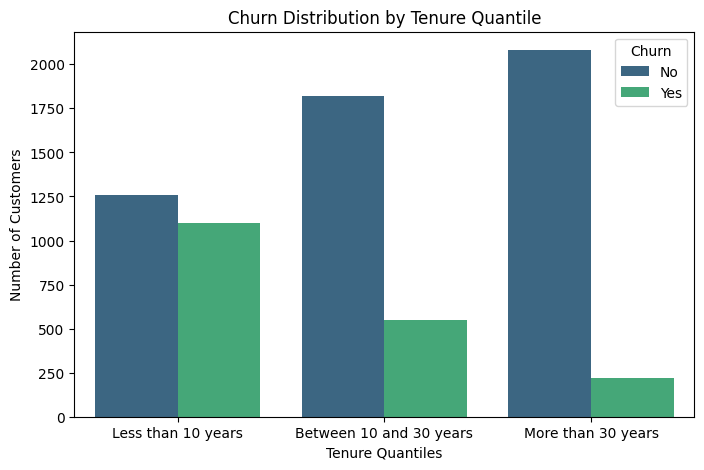

In [112]:
df['tenure_range']=pd.qcut(df["tenure"],q=3,labels=['Less than 10 years',"Between 10 and 30 years", "More than 30 years"])
# Set figure size
plt.figure(figsize=(8, 5))

# Create a countplot to visualize churn by tenure bins
sns.countplot(data=df, x='tenure_range', hue='Churn', palette="viridis")

# Add titles and labels
plt.title("Churn Distribution by Tenure Quantile")
plt.xlabel("Tenure Quantiles")
plt.ylabel("Number of Customers")
plt.legend(title="Churn", labels=["No", "Yes"])

In [113]:
df.groupby(["PhoneService", "MultipleLines"])["Churn"].count().reset_index()


,PhoneService,MultipleLines,Churn
0,No,No,680
1,Yes,No,3385
2,Yes,Yes,2967


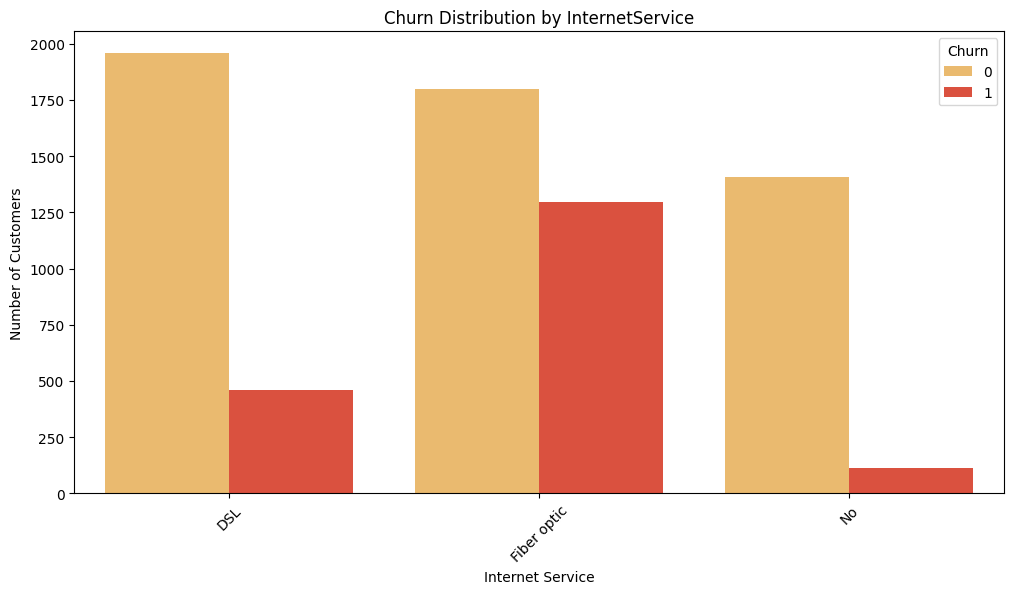

In [114]:

# Set figure size
plt.figure(figsize=(12, 6))

# Create a countplot to visualize churn distribution across combinations of features
sns.countplot(data=df, x='InternetService', hue='Churn', 
              palette='YlOrRd',
              dodge=True, 
              order=['DSL', 'Fiber optic', 'No'])

plt.title("Churn Distribution by InternetService")
plt.xlabel("Internet Service")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)

plt.show()


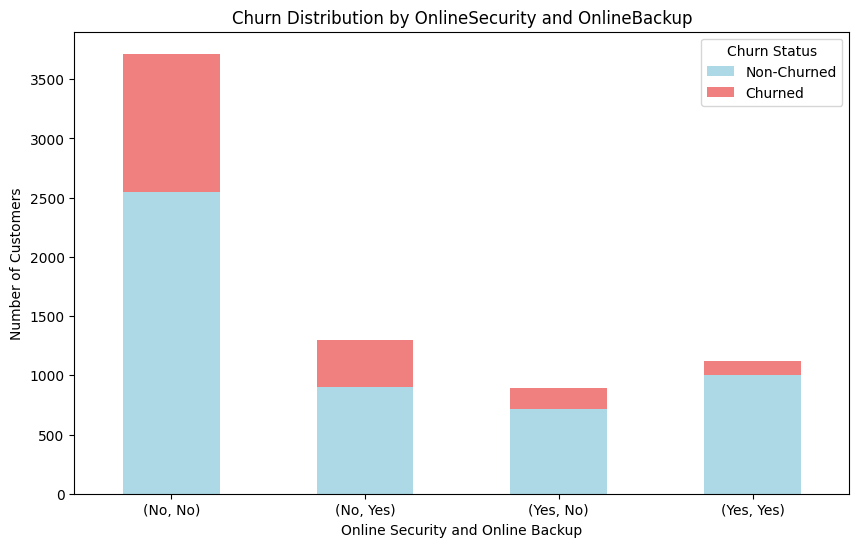

In [115]:
# Create a pivot table for churn by 'OnlineSecurity' and 'OnlineBackup'
pivot = df.groupby(['OnlineSecurity', 'OnlineBackup'])['Churn'].value_counts().unstack()

# Plot stacked bar plot
pivot.plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(10, 6))

# Add labels and title
plt.title("Churn Distribution by OnlineSecurity and OnlineBackup")
plt.xlabel("Online Security and Online Backup")
plt.ylabel("Number of Customers")
plt.xticks(rotation=0)
plt.legend(title="Churn Status", labels=["Non-Churned", "Churned"])
plt.show()



In [116]:
df.groupby(['StreamingMovies'])['Churn'].sum()

StreamingMovies
No     1051
Yes     818
Name: Churn, dtype: int64

In [117]:
from scipy.stats import chi2_contingency

In [118]:
# Chi-squarred test
con_table=pd.crosstab(df["StreamingMovies"],df["Churn"])
# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(con_table)

# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:\n", expected)


Chi-Square Statistic: 25.76414068481938
P-value: 3.857900347663822e-07
Degrees of Freedom: 1
Expected Frequencies Table:
 [[3157.8587884 1143.1412116]
 [2005.1412116  725.8587884]]


In [119]:
df.groupby(['StreamingTV'])['Churn'].sum()

StreamingTV
No     1055
Yes     814
Name: Churn, dtype: int64

In [120]:
df.groupby(['TechSupport'])['Churn'].sum()

TechSupport
No     1559
Yes     310
Name: Churn, dtype: int64

In [121]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_range'],
      dtype='object')

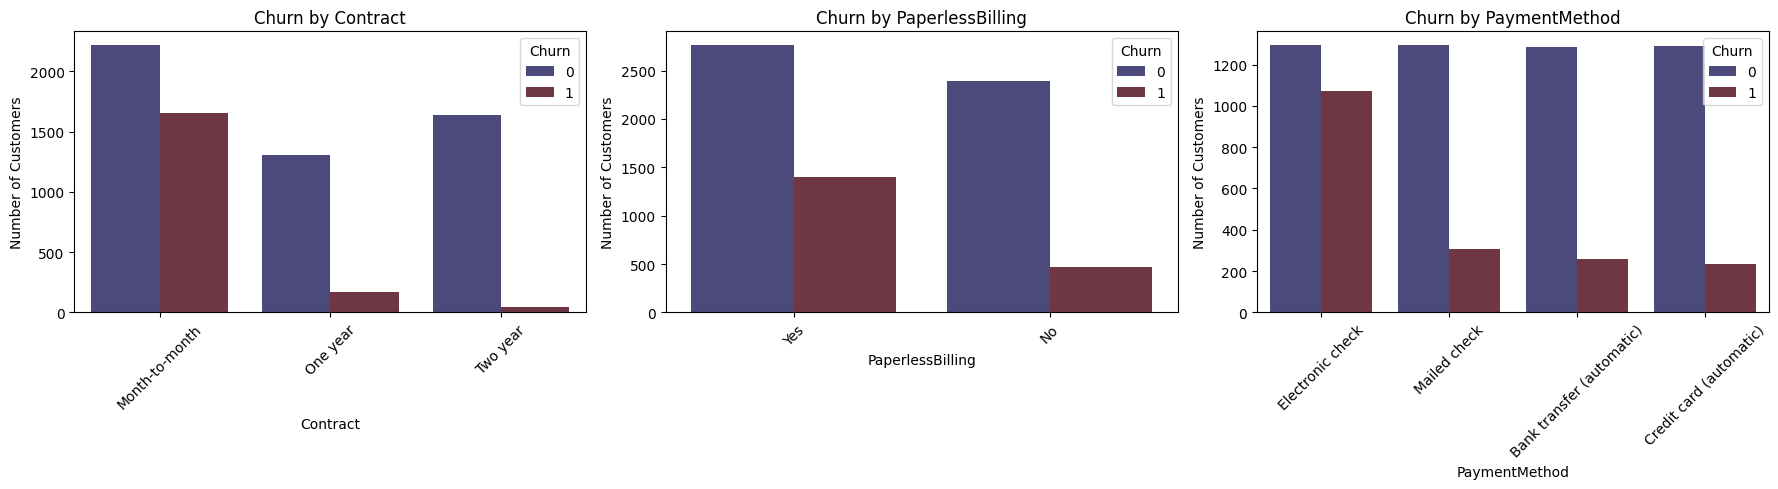

In [122]:

# Set figure size for a 1x3 layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define features to plot
features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Loop through each feature and create a bar plot
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue="Churn", palette="icefire", ax=axes[i])
    axes[i].set_title(f"Churn by {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Number of Customers")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels if needed

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


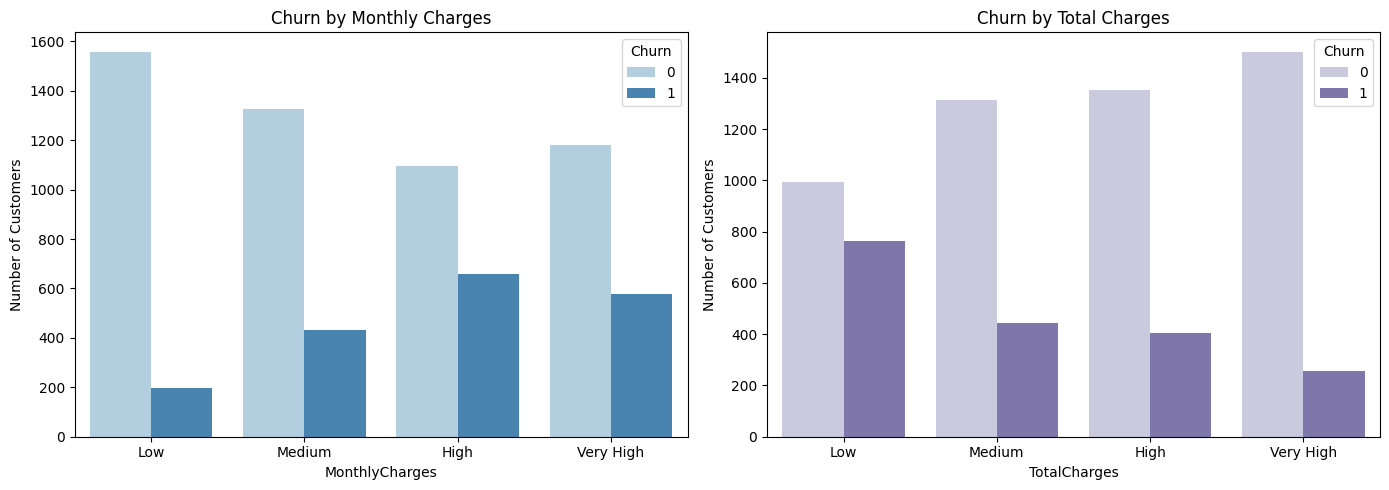

In [123]:
# Bin numerical features into quantiles
df["MonthlyCharges_bin"] = pd.qcut(df["MonthlyCharges"], q=4, labels=["Low", "Medium", "High", "Very High"])
df["TotalCharges_bin"] = pd.qcut(df["TotalCharges"], q=4, labels=["Low", "Medium", "High", "Very High"])

# Set up 1×2 subplot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define features to plot
features = ["MonthlyCharges_bin", "TotalCharges_bin"]
titles = ["Churn by Monthly Charges", "Churn by Total Charges"]
palettes = ["Blues", "Purples"]  # Custom palettes

# Create bar plots
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, hue="Churn", palette=palettes[i], ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(feature.replace("_bin", ""))
    axes[i].set_ylabel("Number of Customers")
    axes[i].tick_params(axis="x", rotation=0)  # Keep labels horizontal

# Adjust layout
plt.tight_layout()
plt.show()

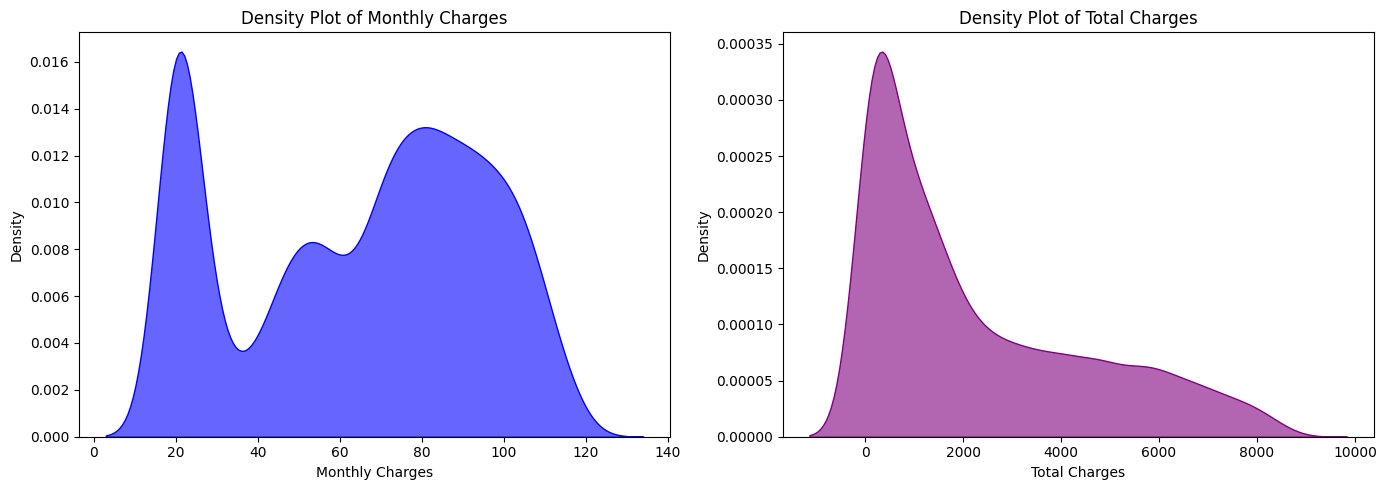

In [125]:

# Set up a 1×2 figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot density for MonthlyCharges
sns.kdeplot(df["MonthlyCharges"], fill=True, color="blue", alpha=0.6, ax=axes[0])
axes[0].set_title("Density Plot of Monthly Charges")
axes[0].set_xlabel("Monthly Charges")
axes[0].set_ylabel("Density")

# Plot density for TotalCharges
sns.kdeplot(df["TotalCharges"], fill=True, color="purple", alpha=0.6, ax=axes[1])
axes[1].set_title("Density Plot of Total Charges")
axes[1].set_xlabel("Total Charges")
axes[1].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()


### Preprocessing procedure
1) Drop 'Gender', 'StreamingTV', Streamingmovies'
2) Encode payment method into electronic check=1 and others = 0
4) Drop total charges for heavily biasing the results
5) One hot encoding of all categorical features
6) Remove imbalancing through ADASYN
